<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Diabetic_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will perform a logistic regression and knn analysis of the data set to see whether a patient will be readmitted to a hospital based on the number of prcedures and diagnosises they had done at the hospital

#Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Load Data

In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/Justinr2940/Machine-learning-Data/main/diabetic_data.csv')

#EDA

In [119]:
df.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [121]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [122]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [124]:
df['readmitted'].unique()#Checking for ? values in specific column

array(['NO', '>30', '<30'], dtype=object)

In [125]:
df['payer_code'].value_counts()#Checking for ? values in specific column

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [126]:
df['num_lab_procedures'].value_counts()#Checking for ? values in specific column

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: num_lab_procedures, Length: 118, dtype: int64

#Data Visualization

In [127]:
df.columns.values.tolist()#Looking at the names of all the columns

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [128]:
age_listing = {'[0-10)':5, '[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95}
df['fixed_age_group'] = df.age.replace(age_listing)
#Creating a int column for age by placing people within the middle of their specifed age group

In [129]:
df[['fixed_age_group']].head()

,fixed_age_group
0,5
1,15
2,25
3,35
4,45


In [130]:
df.drop('age', axis= 1, inplace = True)

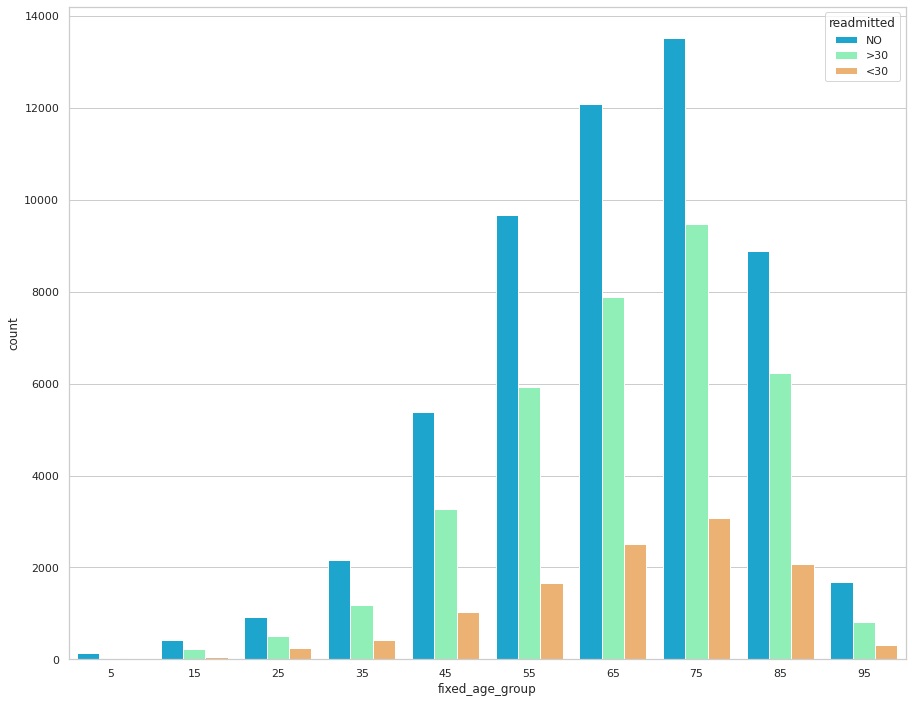

In [131]:
sns.set_style('whitegrid')
sns.countplot(x = "fixed_age_group", hue='readmitted', data = df, palette = "rainbow")
sns.set(rc = {'figure.figsize':(15,12)})
#Compared the amount of people in each age group to wheather they were readmitted within the the last thirty days or not readmitted at all

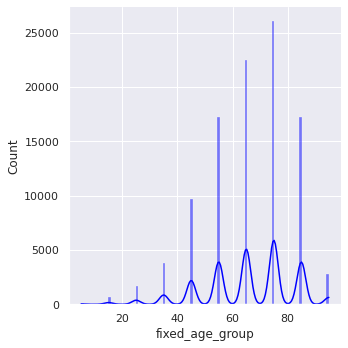

In [132]:
sns.displot(df['fixed_age_group'].dropna(), kde= True, color = 'blue', bins = 100)
#Used a dist olot to see the amount of people within each age group

In [133]:
df['weight'].unique()#Values in the weight column

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

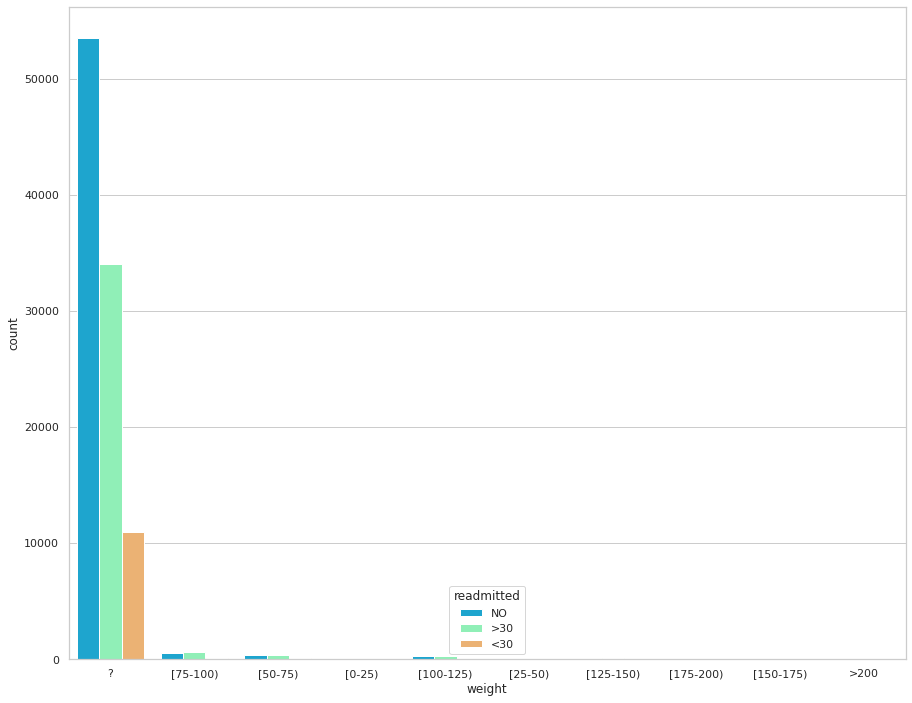

In [134]:
sns.set_style('whitegrid')
sns.countplot(x = "weight", hue='readmitted', data = df, palette = "rainbow")
sns.set(rc = {'figure.figsize':(15,12)})

#More EDA

In [135]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [136]:
df.drop(['weight'], axis = 1, inplace = True)#Dropping weight column because there were barely any values compared to the large amount of data given

In [137]:
df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,fixed_age_group
0,2278392,8222157,Caucasian,Female,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,NO,5
1,149190,55629189,Caucasian,Female,1,1,7,3,?,?,...,Up,No,No,No,No,No,Ch,Yes,>30,15
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,?,?,...,No,No,No,No,No,No,No,Yes,NO,25
3,500364,82442376,Caucasian,Male,1,1,7,2,?,?,...,Up,No,No,No,No,No,Ch,Yes,NO,35
4,16680,42519267,Caucasian,Male,1,1,7,1,?,?,...,Steady,No,No,No,No,No,Ch,Yes,NO,45


In [138]:
gender = pd.get_dummies(df['gender'], drop_first = True)
df = pd.concat([df, gender], axis = 1)
df.drop(['gender','Unknown/Invalid'], axis = 1, inplace = True)
#Creating dummy variable for gender to change it to a int variiable
df.head()

,encounter_id,patient_nbr,race,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,fixed_age_group,Male
0,2278392,8222157,Caucasian,6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,NO,5,0
1,149190,55629189,Caucasian,1,1,7,3,?,?,59,...,No,No,No,No,No,Ch,Yes,>30,15,0
2,64410,86047875,AfricanAmerican,1,1,7,2,?,?,11,...,No,No,No,No,No,No,Yes,NO,25,0
3,500364,82442376,Caucasian,1,1,7,2,?,?,44,...,No,No,No,No,No,Ch,Yes,NO,35,1
4,16680,42519267,Caucasian,1,1,7,1,?,?,51,...,No,No,No,No,No,Ch,Yes,NO,45,1


In [139]:
race =pd.get_dummies(df['race'], drop_first = True)
df = pd.concat([df, race], axis = 1)
df.drop(['race'], axis = 1, inplace = True)
df.head()
#Creatting dummy variables for race

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,fixed_age_group,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,6,25,1,1,?,Pediatrics-Endocrinology,41,0,...,No,No,NO,5,0,0,0,1,0,0
1,149190,55629189,1,1,7,3,?,?,59,0,...,Ch,Yes,>30,15,0,0,0,1,0,0
2,64410,86047875,1,1,7,2,?,?,11,5,...,No,Yes,NO,25,0,1,0,0,0,0
3,500364,82442376,1,1,7,2,?,?,44,1,...,Ch,Yes,NO,35,1,0,0,1,0,0
4,16680,42519267,1,1,7,1,?,?,51,0,...,Ch,Yes,NO,45,1,0,0,1,0,0


In [140]:
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,fixed_age_group,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,6,25,1,1,?,Pediatrics-Endocrinology,41,0,...,No,No,NO,5,0,0,0,1,0,0
1,149190,55629189,1,1,7,3,?,?,59,0,...,Ch,Yes,>30,15,0,0,0,1,0,0
2,64410,86047875,1,1,7,2,?,?,11,5,...,No,Yes,NO,25,0,1,0,0,0,0
3,500364,82442376,1,1,7,2,?,?,44,1,...,Ch,Yes,NO,35,1,0,0,1,0,0
4,16680,42519267,1,1,7,1,?,?,51,0,...,Ch,Yes,NO,45,1,0,0,1,0,0


In [141]:
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,fixed_age_group,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,6,25,1,1,?,Pediatrics-Endocrinology,41,0,...,No,No,NO,5,0,0,0,1,0,0
1,149190,55629189,1,1,7,3,?,?,59,0,...,Ch,Yes,>30,15,0,0,0,1,0,0
2,64410,86047875,1,1,7,2,?,?,11,5,...,No,Yes,NO,25,0,1,0,0,0,0
3,500364,82442376,1,1,7,2,?,?,44,1,...,Ch,Yes,NO,35,1,0,0,1,0,0
4,16680,42519267,1,1,7,1,?,?,51,0,...,Ch,Yes,NO,45,1,0,0,1,0,0


In [142]:
diabetesMed =pd.get_dummies(df['diabetesMed'], drop_first = True)
df = pd.concat([df, diabetesMed], axis = 1)
df.drop(['diabetesMed'], axis = 1, inplace = True)

In [143]:
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,change,readmitted,fixed_age_group,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Yes
0,2278392,8222157,6,25,1,1,?,Pediatrics-Endocrinology,41,0,...,No,NO,5,0,0,0,1,0,0,0
1,149190,55629189,1,1,7,3,?,?,59,0,...,Ch,>30,15,0,0,0,1,0,0,1
2,64410,86047875,1,1,7,2,?,?,11,5,...,No,NO,25,0,1,0,0,0,0,1
3,500364,82442376,1,1,7,2,?,?,44,1,...,Ch,NO,35,1,0,0,1,0,0,1
4,16680,42519267,1,1,7,1,?,?,51,0,...,Ch,NO,45,1,0,0,1,0,0,1


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   admission_type_id         101766 non-null  int64 
 3   discharge_disposition_id  101766 non-null  int64 
 4   admission_source_id       101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   payer_code                101766 non-null  object
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

In [145]:
df.rename(columns = {'Yes':'diabetesMed'}, inplace = True)

In [322]:
df.drop(['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], axis = 1, inplace = True)


#Data Splitting

In [147]:
from sklearn.model_selection import train_test_split

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   admission_type_id         101766 non-null  int64 
 3   discharge_disposition_id  101766 non-null  int64 
 4   admission_source_id       101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   payer_code                101766 non-null  object
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

In [338]:
df['acetohexamide'].unique()

array(['No', 'Steady'], dtype=object)

In [364]:
X = df[['fixed_age_group','time_in_hospital', 'num_procedures', 'num_lab_procedures','num_medications', 'Male', 'Caucasian', 'Hispanic', 'Asian', 'AfricanAmerican','number_emergency', 'number_inpatient', 'number_outpatient', 'Other', 'diabetesMed'  ]]
y = df['readmitted']
#Creating the Variables
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values



In [365]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=5000, random_state=0)#Splitting the data with a test size of 1000

In [366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#Transforming the data

StandardScaler()

In [367]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic regression

In [368]:
from sklearn.linear_model import LogisticRegression

In [369]:
classifier =LogisticRegression(random_state= 0)#Create logistic regression model


In [370]:
classifier.fit(X_train, y_train)#Fit data to model

LogisticRegression(random_state=0)

###Making predictions

In [371]:
y_pred = classifier.predict(X_test)

In [372]:
prediction = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [373]:
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test))
pp = classifier.predict(X_test)

the preditction accuracy of the model is  0.7662


In [374]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1169
           1       0.77      1.00      0.87      3831

    accuracy                           0.77      5000
   macro avg       0.38      0.50      0.43      5000
weighted avg       0.59      0.77      0.66      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN Model

In [377]:
scaled_x_train = sc.transform(X_train)
scaled_x_test = sc.transform(X_test)

In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train)#Build knn model

KNeighborsClassifier()

In [379]:
pred = knn.predict(scaled_x_test)

In [380]:
classifier.fit(scaled_x_train, y_train) # fitting the model

LogisticRegression(random_state=0)

In [381]:
y_pred = classifier.predict(scaled_x_test)
y_pred#Making predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [382]:
accuracy_score(y_test, y_pred)#Accuracy of the knn model

0.7662

In [383]:
print('With k = 5')
print(confusion_matrix(y_test, pred))

With k = 5
[[  11 1158]
 [  30 3801]]


In [384]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.27      0.01      0.02      1169
           1       0.77      0.99      0.86      3831

    accuracy                           0.76      5000
   macro avg       0.52      0.50      0.44      5000
weighted avg       0.65      0.76      0.67      5000



###Error rate

In [166]:
error_rate = [] #Predicting the error rate for the model

for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

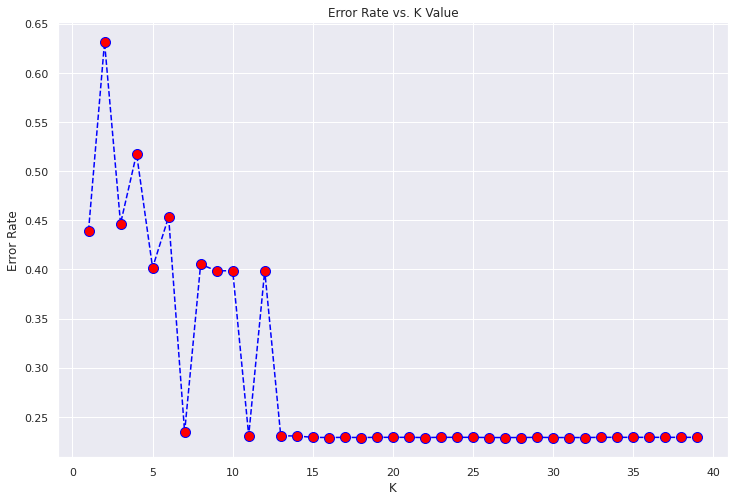

In [167]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Graphing the error rate for the model